# Optimization for Logistic Regression 
## Kate Kenny 
### CS 0451

In this blog, I will explore optimization for logistic regression through the implementation of three optimization algorithms: simple gradient descent, a momentum method, and stochastic gradient descent. Through experimentation we will compare the performance of each of these algoritms for training linear regression. 

### Gradient Descent
First, we will implement standard gradient descent for logistic regression. This algorithm uses the following equation to calculate the gradient descent for $L(\textbf{w}) = \frac{1}{n} \sum_{i=1}^{n}l(f_{\textbf{w}}(\textbf{x_i}),y_i)$ that we derived in class. 

$\nabla L(\textbf{w}) = \frac{1}{n}  \sum_{i=1}^{n}{(\sigma (\hat{y_i}) - y_i)\textbf{x_i}}$

My approach to implementing this algorithm was somewhat similar to the way in which I implemented the perceptron algorithm last week. Similarly, the main method in my LogisticRegression class is a fit() method which takes in a matrix of features $X$ and a vector of labels $y$. The fit() method generates a random vector of weights, $w$, and then updates that weight vector based on the gradient descent equation and update step. This results in an algorithm which can estimate the minimum of the loss function and as such gives a hyperplane (a line in our experiments) that can estimate the labels for data that is not linearly seperable. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


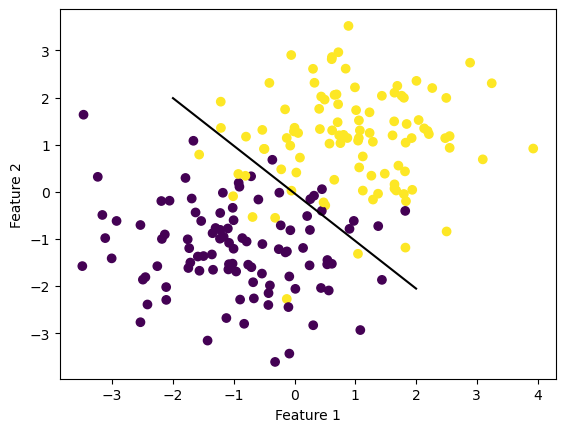

In [37]:
from logistic_regression import LogisticRegression # your source code
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 


%load_ext autoreload
%autoreload 2


# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

#create instance of LogisticRegression Class and fit data 
LR = LogisticRegression()
LR.fit(X, y, alpha=.001)

def draw_line(w, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w[0]*x + w[2])/w[1]
    plt.plot(x, y, color = "black")

#plot line using calculated weights 
fig = draw_line(LR.w, -2, 2)

### Stochastic Gradient Descent

Next, I am going to implement the stochastic gradient descent algorithm for logistic regression optimization. Similar to the standard gradient descent algorithm used above, the stocashtic algorithm can be used to sort data that is not linearly seperable.

Instead of computing the gradient as we did earlier, for this algorithm we compute the stochastic gradient by picking a random subset $S \in [n]$ and computing the following. 

$\nabla L(\textbf{w}) = \frac{1}{|S|}  \sum_{i=1}^{n}{(\sigma (\hat{y_i}) - y_i)\textbf{x_i}}$

The implementation of this algorithm is similar to that for gradient descent above but uses random batches of the data points and iterates through those batches to estimate the minimum of the loss function we are working with. 

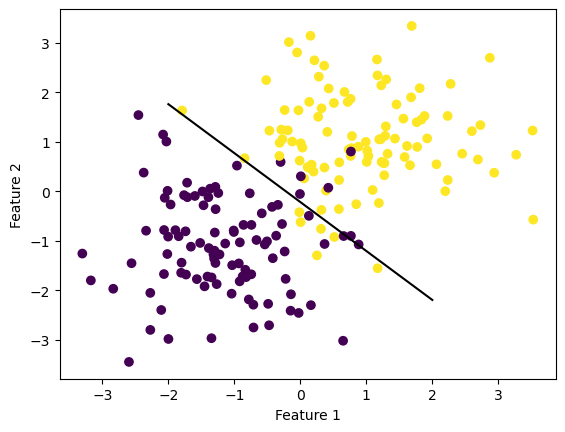

In [38]:
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

LR = LogisticRegression()
LR.fit_stochastic(X, y)

def draw_line(w, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w[0]*x + w[2])/w[1]
    plt.plot(x, y, color = "black")

#plot line using calculated weights 
fig = draw_line(LR.w, -2, 2)

## Loss Illustration

Below is an illustration of the loss over epochs for the two algorithms implemented above: gradient descent and stochastic gradient descent. Both have an alpha of .001 and have the maximum number of epochs set to 10,000. 

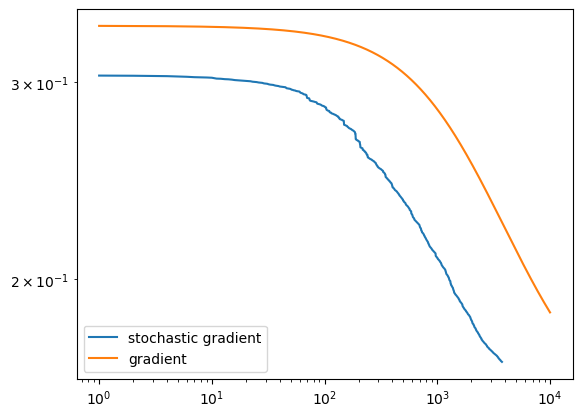

In [36]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 10000,  
                  alpha = .001) 

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, alpha = .001, max_epochs = 10000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog() 

legend = plt.legend() 



## Other Experiments

### Alpha too large

Now, let's examine a case where gradient descent does not converge because the selected alpha size is too large. Below is a plot of the loss of gradient descent with two different alpha values, .01 and 10. For this experiment, we are going to run the models on data with 10 feature dimensions. 

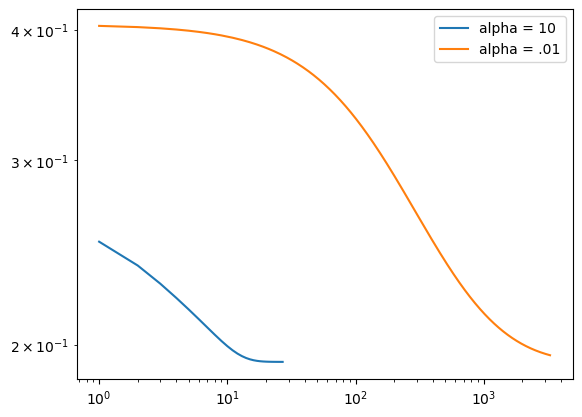

In [49]:
#Cr
p_features = 10
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])


LR = LogisticRegression()
LR.fit(X, y, alpha = 10, max_epochs = 10000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "alpha = 10")

LR = LogisticRegression()
LR.fit(X, y, alpha = .01, max_epochs = 10000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "alpha = .01")

plt.loglog() 

legend = plt.legend() 


### Batch size
Our next experiment is the case where the batch size influences how quickly our algorithm (stochastic gradient descent) converges. To illustrate this, we are going to run the algorithm on two different batch sizes and examine the loss convergence. 

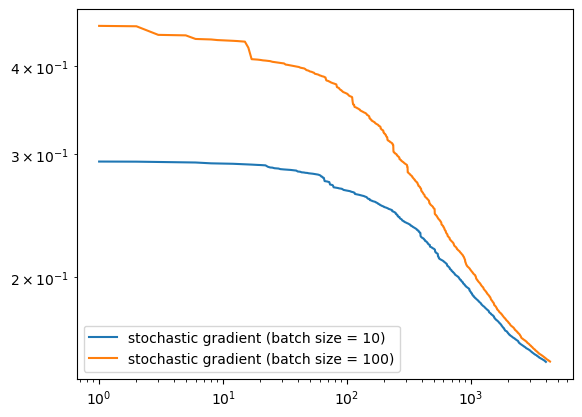

In [41]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 10000, 
                  batch_size = 10, 
                  alpha = .001) 

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (batch size = 10)")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 10000, 
                  batch_size = 100, 
                  alpha = .001) 

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (batch size = 100)")

plt.loglog() 

legend = plt.legend() 